<a href="https://colab.research.google.com/github/irislqy/Classification_Business_cases/blob/master/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Develop ML models. Apply LogisticRegression, SVM, RandomForest classification algorithms. 
2. Apply GridSearchCV to find the best hyperparameters.
3. Assess model performance (confusion matrix, precision, recall, ROC AUC) and interpret performance from business
impact viewpoint (false negatives vs false positives). 
4. Apply AutoML (Auto sklearn) to build classification model and compare model performance.

## Classfication Model

###Import Dataset

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/irislqy/Classification_Business_cases/master/heart.csv")


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


###Import modules

In [0]:
#import

#pandas
import pandas as pd

#numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import time
import random
import sklearn


#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


from yellowbrick.features import RFECV
import statsmodels.formula.api as smf

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


from sklearn import metrics
from sklearn.metrics import mean_absolute_error, accuracy_score


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, auc

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

## Logistic Regression/ Random Forest/SVM prediction

##logistic *regression*

In [0]:
features = df.drop(['target'],axis=1)
target = df.target

In [10]:
# Here is the accuracy of Logistic Regression as 0.836
train_x,test_x,train_y,test_y = train_test_split(features,target,random_state=30,test_size=0.2)
model_Log = LogisticRegression(random_state=34)
model_Log.fit(train_x,train_y)
print("Accuracy using LogisticRegression ",accuracy_score(test_y,model_Log.predict(test_x)))
print('Precision Score : ' + str(precision_score(test_y,model_Log.predict(test_x))))
print('Recall Score : ' + str(recall_score(test_y,model_Log.predict(test_x))))
print('F1 Score : ' + str(f1_score(test_y,model_Log.predict(test_x))))

Accuracy using LogisticRegression  0.8360655737704918
Precision Score : 0.9090909090909091
Recall Score : 0.8108108108108109
F1 Score : 0.8571428571428571


<Figure size 576x396 with 0 Axes>

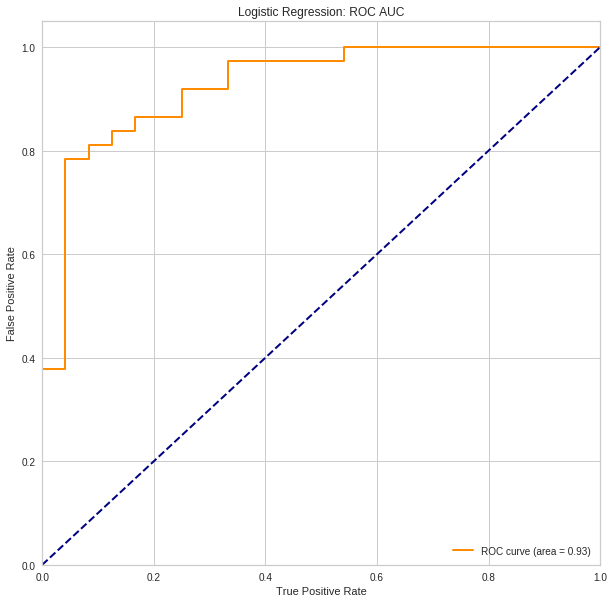

In [11]:
# ROC RUC for Logistic Regression
predictions=model_Log.predict_proba(test_x)
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions[:, 1])
roc_auc=auc(false_positive_rate,recall)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.title('Logistic Regression: ROC AUC')
plt.plot(false_positive_rate, recall, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()

###GridsearchCV

In [12]:
#Grid Search

clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(train_x, train_y)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(test_x)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(test_y,y_pred_acc)))
print('Precision Score : ' + str(precision_score(test_y,y_pred_acc)))
print('Recall Score : ' + str(recall_score(test_y,y_pred_acc)))
print('F1 Score : ' + str(f1_score(test_y,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(test_y,y_pred_acc)

Accuracy Score : 0.6065573770491803
Precision Score : 0.6065573770491803
Recall Score : 1.0
F1 Score : 0.7551020408163265


array([[ 0, 24],
       [ 0, 37]])

<Figure size 576x396 with 0 Axes>

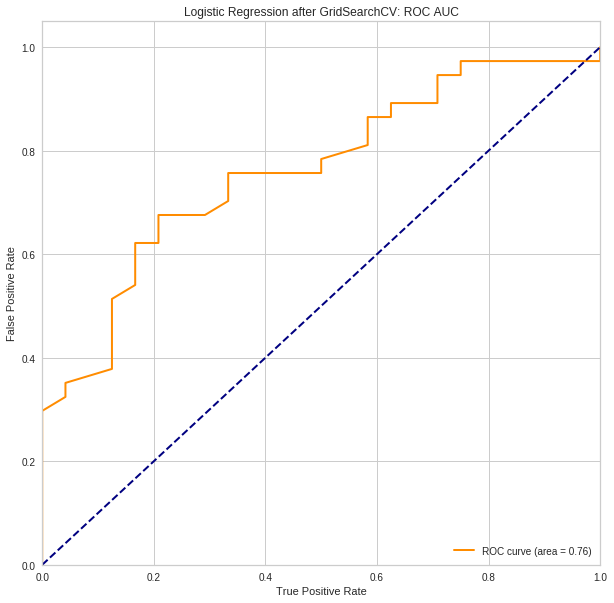

In [13]:
# ROC RUC for Logistic Regression after GridSearchCV
predictions=grid_clf_acc.predict_proba(test_x)
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions[:, 1])
roc_auc=auc(false_positive_rate,recall)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.title('Logistic Regression after GridSearchCV: ROC AUC')
plt.plot(false_positive_rate, recall, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()

##random forest

In [23]:
# and here is the accuracy of Random Forest Classifier, as 0.72
model_RFC = RandomForestClassifier(random_state=45)
model_RFC.fit(train_x,train_y)
print("Accuracy using RandomForestClassifier ",accuracy_score(test_y,model_RFC.predict(test_x)))
print('Precision Score : ' + str(precision_score(test_y,model_RFC.predict(test_x))))
print("Recall Score : " + str(recall_score(test_y,model_RFC.predict(test_x))))
print('F1 Score : ' + str(f1_score(test_y,model_RFC.predict(test_x))))

Accuracy using RandomForestClassifier  0.7213114754098361
Precision Score : 0.8846153846153846
Recall Score : 0.6216216216216216
F1 Score : 0.7301587301587302


<Figure size 576x396 with 0 Axes>

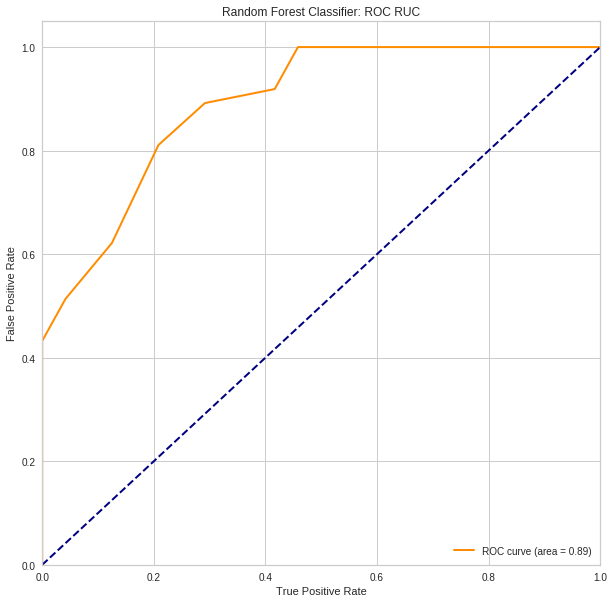

In [24]:
# ROC RUC for Random Forest Classifier
predictions=model_RFC.predict_proba(test_x)
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions[:, 1])
roc_auc=auc(false_positive_rate,recall)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.title('Random Forest Classifier: ROC RUC')
plt.plot(false_positive_rate, recall, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()

###GridSearchCV

In [30]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = model_RFC, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

rf_grid.fit(train_x, train_y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   33.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=45, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 5], 'min_samples_split': [8, 12], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [33]:
#prediction score after tuning is 0.85, much higher than before tuning.
rf_grid.best_params_
print("Accuracy using RandomForestClassifier ",accuracy_score(test_y,rf_grid.predict(test_x)))
print('Precision Score : ' + str(precision_score(test_y,rf_grid.predict(test_x))))
print("Recall Score : " + str(recall_score(test_y,rf_grid.predict(test_x))))
print('F1 Score : ' + str(f1_score(test_y,rf_grid.predict(test_x))))

Accuracy using RandomForestClassifier  0.8524590163934426
Precision Score : 0.9375
Recall Score : 0.8108108108108109
F1 Score : 0.8695652173913043


<Figure size 576x396 with 0 Axes>

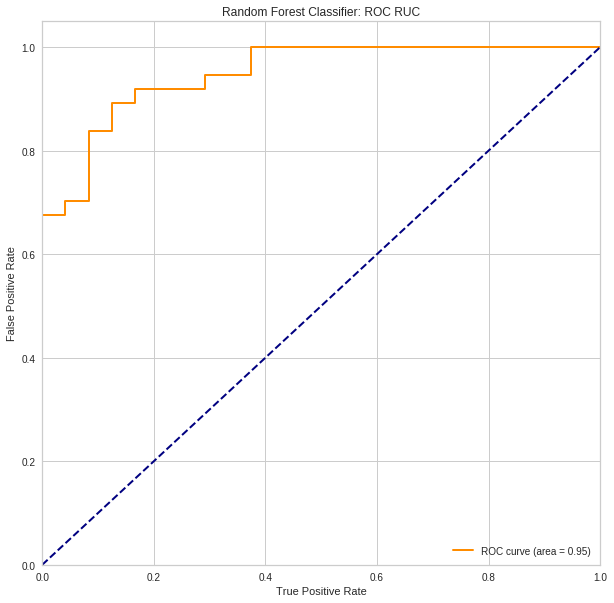

In [34]:
# ROC RUC for Random Forest Classifier after GridSearchCV
predictions=rf_grid.predict_proba(test_x)
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions[:, 1])
roc_auc=auc(false_positive_rate,recall)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.title('Random Forest Classifier: ROC RUC')
plt.plot(false_positive_rate, recall, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.show()

##svm

In [52]:
# here is the accuracy of SVM:C=0.8, kernel='linear' , as 0.85
clf1 = svm.SVC(C=0.8, kernel='linear', decision_function_shape='ovr')
clf1.fit(train_x, train_y)
print("accuracy:"+str(np.average(cross_val_score(clf1, train_x, train_y, scoring='accuracy'))))
print("Precision Score:"+str(np.average(cross_val_score(clf1, train_x, train_y, scoring='precision'))))
print("Recall Score"+str(np.average(cross_val_score(clf1, train_x, train_y, scoring='recall'))))
print("f1:"+str(np.average(cross_val_score(clf1, train_x, train_y, scoring='f1'))))

accuracy:0.8429012345679011
Precision Score:0.8336434108527131
Recall Score0.8831672203765226
f1:0.8562521065048871


<Figure size 576x396 with 0 Axes>

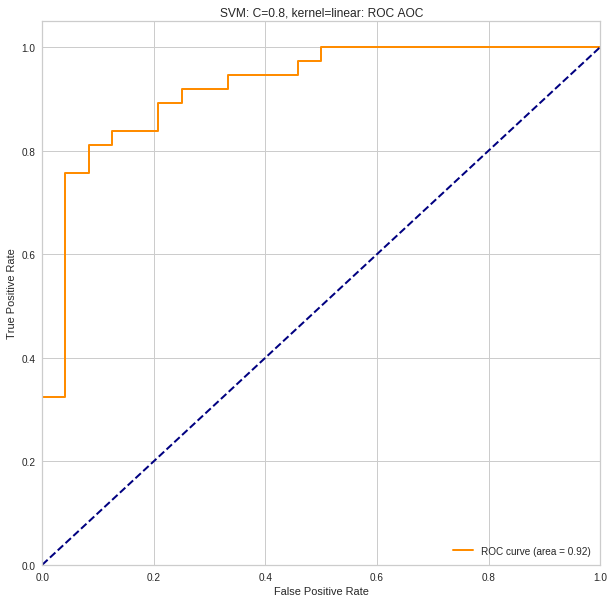

In [39]:
# ROC RUC curve for SVM: C=0.8, kernel='linear'

y_score = clf1.fit(train_x, train_y).decision_function(test_x)
fpr,tpr,threshold = roc_curve(test_y, y_score)
roc_auc = auc(fpr,tpr)


plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM: C=0.8, kernel=linear: ROC AOC')
plt.legend(loc="lower right")
plt.show()

In [40]:
# here is the accuracy of SVM:C=0.8, kernel='rbf' , as 1, which could result from overfitting
clf2 = svm.SVC(C=0.8, kernel='rbf', decision_function_shape='ovr')
clf2.fit(train_x, train_y)
print(clf2.score(train_x, train_y))

1.0


<Figure size 576x396 with 0 Axes>

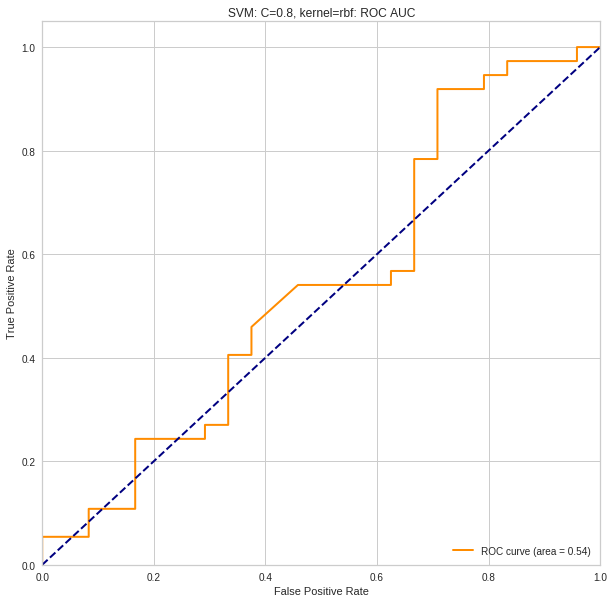

In [42]:
# ROC RUC curve for SVM: C=0.8, kernel='rbf'
# does not perform well in ROC

from sklearn.metrics import roc_curve, auc
y_score = clf2.fit(train_x, train_y).decision_function(test_x)
fpr,tpr,threshold = roc_curve(test_y, y_score)
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM: C=0.8, kernel=rbf: ROC AUC')
plt.legend(loc="lower right")
plt.show()

###Gridsearch

In [0]:
# SVM GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
parameters = {'kernel':('linear', 'rbf'), 'C':[0.8,0.9,1]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters, scoring='f1_macro', cv=5)
result = clf.fit(train_x, train_y)

In [45]:
# Result of SVM GridSearch
result_svc = pd.DataFrame(result.cv_results_)
result_svc.sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.164142,0.022749,0.002082,0.000039,0.8,linear,"{'C': 0.8, 'kernel': 'linear'}",0.856184,0.854968,0.816020,...,0.836945,0.044203,1,0.857518,0.852026,0.847763,0.858076,0.890651,0.861207,0.015201
2,0.191363,0.034767,0.002117,0.000127,0.9,linear,"{'C': 0.9, 'kernel': 'linear'}",0.856184,0.854968,0.816020,...,0.836945,0.044203,1,0.857518,0.852026,0.847763,0.858076,0.885588,0.860194,0.013249
4,0.206109,0.038704,0.002061,0.000012,1,linear,"{'C': 1, 'kernel': 'linear'}",0.856184,0.811297,0.816020,...,0.828102,0.044081,3,0.852446,0.852446,0.847763,0.858076,0.885588,0.859264,0.013562
1,0.005385,0.000326,0.002131,0.000160,0.8,rbf,"{'C': 0.8, 'kernel': 'rbf'}",0.346667,0.346667,0.346667,...,0.345941,0.001742,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.005074,0.000047,0.002014,0.000094,0.9,rbf,"{'C': 0.9, 'kernel': 'rbf'}",0.346667,0.346667,0.346667,...,0.345941,0.001742,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [53]:
#before gridsearch
#accuracy:0.8429012345679011
#Precision Score:0.8336434108527131
#Recall Score0.8831672203765226
#f1:0.8562521065048871

from sklearn.model_selection import cross_val_score
print("accuracy:"+str(np.average(cross_val_score(clf, train_x, train_y, scoring='accuracy'))))
print("f1:"+str(np.average(cross_val_score(clf, train_x, train_y, scoring='f1'))))
print("Precision Score:"+str(np.average(cross_val_score(clf, train_x, train_y, scoring='precision'))))
print("Recall Score"+str(np.average(cross_val_score(clf, train_x, train_y, scoring='recall'))))


accuracy:0.8429012345679011
f1:0.8562521065048871
Precision Score:0.8336434108527131
Recall Score0.8831672203765226


##AutoML

###h2o

**XGBoost is the best performed model in this case.**


In [30]:
!pip -q install requests

!pip -q install tabulate
!pip -q install "colorama>=0.3.8"
!pip -q install future
!pip -q install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

     |████████████████████████████████| 121.0MB 208kB/s 


In [32]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.2" 2019-01-15; OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3); OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpss06326g
  JVM stdout: /tmp/tmpss06326g/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpss06326g/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_unknownUser_pg13md
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


###Model

In [40]:
df1 = h2o.import_file("https://raw.githubusercontent.com/irislqy/Classification_Business_cases/master/heart.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [62]:
df1.head()

﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
44,1,1,120,263,0,1,173,0,0,2,0,3,1
52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [0]:
#enum
df1['target'] = df1['target'].asfactor()

In [0]:
# Randomly split the data into 75% training and 25% testing.
train, test = df1.split_frame(ratios=[0.9], seed=1234)

# Now train the baseline model.
# We will train a GBM model with early stopping.
from h2o.estimators.gbm import H2OGradientBoostingEstimator
x = train.columns
y = "target"
x.remove(y)

In [74]:
#train for 5 minutes, 300 maximum number of models,
#other parameters to set: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

aml = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)
aml.train(x = x, y = y, training_frame = df1)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [75]:
###Access the AutoML Leaderboard
lb = aml.leaderboard
lb.head() #shows the top performance model
#lb.head(rows=lb.nrows) # Entire leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_20190504_022901_model_6,0.905753,0.38569,0.167457,0.350619,0.122933
XGBoost_grid_1_AutoML_20190504_022901_model_8,0.904567,0.410224,0.179447,0.357145,0.127552
XGBoost_1_AutoML_20190504_022901,0.903996,0.391297,0.18307,0.352966,0.124585
XGBoost_grid_1_AutoML_20190504_022901_model_2,0.902723,0.390287,0.157839,0.352243,0.124075
GBM_grid_1_AutoML_20190504_022901_model_3,0.902415,0.508442,0.172925,0.403139,0.162521
XGBoost_2_AutoML_20190504_022901,0.902218,0.421309,0.195125,0.361486,0.130672
StackedEnsemble_BestOfFamily_AutoML_20190504_022901,0.901669,0.395005,0.173518,0.356186,0.126868
StackedEnsemble_AllModels_AutoML_20190504_022901,0.899429,0.40678,0.175296,0.356497,0.12709
XGBoost_3_AutoML_20190504_022901,0.89877,0.405035,0.17108,0.358167,0.128283
XGBoost_grid_1_AutoML_20190504_022901_model_5,0.893368,0.408696,0.192161,0.36246,0.131377


In [76]:
#Best Model: XGBoost_grid_1_AutoML_20190502_185631_model_6 
#Prediction 
preds = aml.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [77]:
preds

predict,p0,p1
1,0.0774726,0.922527
1,0.0871063,0.912894
1,0.162652,0.837348
1,0.226922,0.773078
1,0.144026,0.855974
1,0.0359757,0.964024
1,0.0870981,0.912902
1,0.304982,0.695018
1,0.0904363,0.909564
1,0.214166,0.785834


In [0]:
#save leader model
#h2o.save_model(aml.leader, path = "./Loan_Pred_Model_III_shaz13")

##Conclusion

**1. GridSearchCV without enough generations does not yield a better model. Heart Diasease diagnosis case is more sensitive to false negative, we should control the Recall score at a safer threshold. The important measurements of the model should be Recall and Accuracy Score**




**2. H2o is a powerful AutoML tool which can select the best performing model in a certain time limits. If the real business case require a quick decision making, AutoML could step in to pick the best five or ten performing models and do the following comparison for precision and recall score to pick the best applicable model. **